# Exploration

[Main Notebook](https://adb-731998097721284.4.azuredatabricks.net/?o=731998097721284#notebook/1038316885898243/command/1038316885898246)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as f
from pyspark.sql.functions import *
from pyspark.sql import SQLContext
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, max

sqlContext = SQLContext(sc)

In [0]:
# Configuration for Blob Storage 

blob_container = "container1" # The name of your container created in https://portal.azure.com
storage_account = "w261sp22team12" # The name of your Storage account created in https://portal.azure.com
secret_scope = "s1" # The name of the scope created in your local computer using the Databricks CLI
secret_key = "k1" # The name of the secret key created in your local computer using the Databricks CLI 
blob_url = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"
mount_path = "/mnt/mids-w261"

In [0]:
# SAS Token
spark.conf.set(
  f"fs.azure.sas.{blob_container}.{storage_account}.blob.core.windows.net",
  dbutils.secrets.get(scope = secret_scope, key = secret_key)
)


## Airlines Data Visualizations

In [0]:
airlines = spark.read.parquet(f"{blob_url}/airlines")
airlines.printSchema()

root
-- year: integer (nullable = true)
-- quarter: integer (nullable = true)
-- month: integer (nullable = true)
-- day_of_month: integer (nullable = true)
-- day_of_week: integer (nullable = true)
-- fl_date: string (nullable = true)
-- time_zone: string (nullable = true)
-- origin: string (nullable = true)
-- origin_icao: string (nullable = true)
-- origin_city_name: string (nullable = true)
-- origin_airport_id: integer (nullable = true)
-- origin_state_abr: string (nullable = true)
-- dest_airport_id: integer (nullable = true)
-- dest_state_abr: string (nullable = true)
-- dest_city_name: string (nullable = true)
-- dest: string (nullable = true)
-- dest_icao: string (nullable = true)
-- op_unique_carrier: string (nullable = true)
-- op_carrier_airline_id: integer (nullable = true)
-- op_carrier_fl_num: integer (nullable = true)
-- tail_num: string (nullable = true)
-- dep_time_blk: string (nullable = true)
-- arr_time_blk: string (nullable = true)
-- crs_dep_time: string (nullable = true)
-- crs_arr_time: string (nullable = true)
-- crs_elapsed_time: double (nullable = true)
-- distance: double (nullable = true)
-- distance_group: integer (nullable = true)
-- dep_delay_new: double (nullable = true)
-- dep_del15: double (nullable = true)
-- cancelled: integer (nullable = true)
-- dep_time: string (nullable = true)
-- arr_time: string (nullable = true)
-- arr_delay_new: double (nullable = true)
-- local_tz: timestamp (nullable = true)
-- local_crs_arr_tz: timestamp (nullable = true)
-- local_arr_tz: timestamp (nullable = true)
-- fl_tz: timestamp (nullable = true)

In [0]:
# number of flights
airlines.count()

Out[18]: 161057

In [0]:
# number of features
len(airlines.columns)

Out[19]: 33

In [0]:
display(airlines.describe())

summary year quarter month day_of_month day_of_week fl_date time_zone origin origin_icao origin_city_name origin_airport_id origin_state_abr dest_airport_id dest_state_abr dest_city_name dest dest_icao op_unique_carrier op_carrier_airline_id op_carrier_fl_num tail_num dep_time_blk arr_time_blk crs_dep_time crs_arr_time crs_elapsed_time distance distance_group dep_delay_new dep_del15 dep_time arr_time count 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 161057 160375 161057 161057 161057 161057 161057 161057 161057 156231 156231 156231 155957 mean 2015.0 1.0 2.0365522765232185 15.591504870946311 3.9165202381765463 null null null null null 11963.80259162905 null 12707.705110613013 null null null null null 20010.91815320042 2508.798711015355 null null null 1422.252767653688 1584.805360834984 124.43478395847433 662.2313404571053 3.1245459681975944 14.368870454647285 0.2348125532064699 1437.2168967746477 1566.3260642356547 stddev 0.0 0.0 0.8326601487890212 8.679527916539666 1.9958147997611555 null null null null null 1755.1815640743694 null 1522.429280372371 null null null null null 314.6264968572752 1746.419264235954 null null null 453.97047418907664 467.0980926231112 64.53709382648107 474.8070240348246 1.8399992218879608 35.59694856311219 0.4238829651381293 463.8574610933493 494.1750849520121 min 2015 1 1 1 1 2015-01-01 America/Chicago ATL KATL Atlanta, GA 10397 GA 10135 AK Akron, OH ABE KABE AA 19393 3 D942DN 0001-0559 0001-0559 1000 1 37.0 67.0 1 0.0 0.0 1 1 max 2015 1 3 31 7 2015-03-31 America/New_York ORD KORD Chicago, IL 13930 IL 15919 WY Wilmington, NC XNA KXNA WN 21171 6534 N9EAMQ 2300-2359 2300-2359 959 959 620.0 4502.0 11 1221.0 1.0 959 959

In [0]:
display(airlines)

year quarter month day_of_month day_of_week fl_date time_zone origin origin_icao origin_city_name origin_airport_id origin_state_abr dest_airport_id dest_state_abr dest_city_name dest dest_icao op_unique_carrier op_carrier_airline_id op_carrier_fl_num tail_num dep_time_blk arr_time_blk crs_dep_time crs_arr_time crs_elapsed_time distance distance_group dep_delay_new dep_del15 dep_time arr_time fl_tz 2015 1 2 1 7 2015-02-01 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MEAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 19.0 1.0 749 1100 2015-02-01T13:30:00.000+0000 2015 1 2 2 1 2015-02-02 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LPAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 null null null null 2015-02-02T13:30:00.000+0000 2015 1 2 3 2 2015-02-03 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LXAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 5.0 0.0 735 1036 2015-02-03T13:30:00.000+0000 2015 1 2 4 3 2015-02-04 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LHAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 727 1013 2015-02-04T13:30:00.000+0000 2015 1 2 5 4 2015-02-05 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LYAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 27.0 1.0 757 1101 2015-02-05T13:30:00.000+0000 2015 1 2 6 5 2015-02-06 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LVAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 723 1011 2015-02-06T13:30:00.000+0000 2015 1 2 8 7 2015-02-08 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MAAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 728 1018 2015-02-08T13:30:00.000+0000 2015 1 2 9 1 2015-02-09 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MGAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 37.0 1.0 807 1058 2015-02-09T13:30:00.000+0000 2015 1 2 10 2 2015-02-10 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LTAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 722 1030 2015-02-10T13:30:00.000+0000 2015 1 2 11 3 2015-02-11 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LVAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 724 1100 2015-02-11T13:30:00.000+0000 2015 1 2 12 4 2015-02-12 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LNAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 730 1028 2015-02-12T13:30:00.000+0000 2015 1 2 13 5 2015-02-13 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3JDAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 730 1047 2015-02-13T13:30:00.000+0000 2015 1 2 15 7 2015-02-15 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LXAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 null null null null 2015-02-15T13:30:00.000+0000 2015 1 2 16 1 2015-02-16 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LVAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 728 1016 2015-02-16T13:30:00.000+0000 2015 1 2 17 2 2015-02-17 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MEAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 16.0 1.0 746 1047 2015-02-17T13:30:00.000+0000 2015 1 2 18 3 2015-02-18 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LGAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 724 1022 2015-02-18T13:30:00.000+0000 2015 1 2 19 4 2015-02-19 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LPAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 1.0 0.0 731 1056 2015-02-19T13:30:00.000+0000 2015 1 2 

### Histograms of Numeric Features in Airlines Data

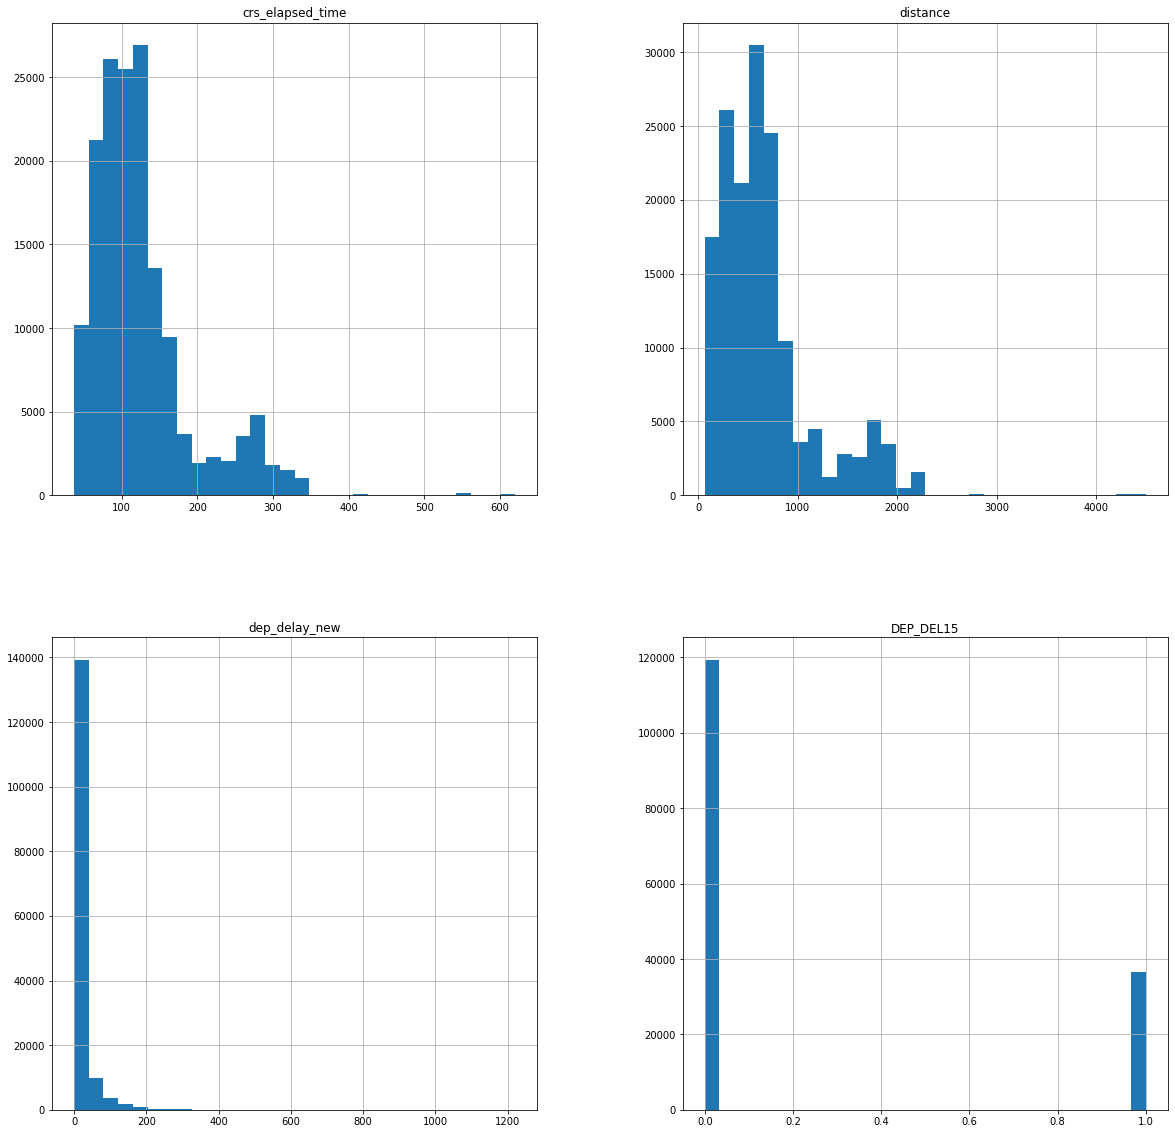

In [0]:
#numeric_features = [column for (column, data_type) in airlines.dtypes if ((data_type == "int" or data_type == "double") and airlines.select(column).distinct().count()) > 31]

numeric_features = ["crs_elapsed_time", "distance", "dep_delay_new"]
numeric_features.append("DEP_DEL15")

numeric_features_hist = airlines.select(numeric_features).toPandas()
numeric_features_hist.hist(figsize=(20, 20), bins=30)
plt.show()

### Correlations for Numeric Features

Out[25]:

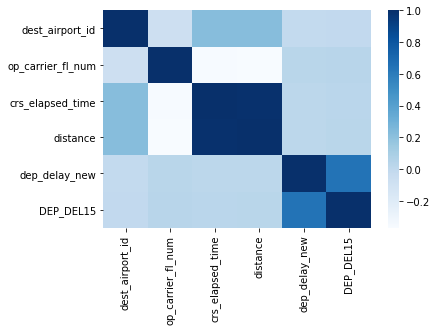

<AxesSubplot:>

In [0]:
sns.heatmap(airlines.select(numeric_features).toPandas().corr(), cmap = "Blues")

## Joined Data with New Features (from Feature Engineering Notebook) Visualizations

In [0]:
df_airlines_weather_agg = spark.read.parquet(f"{blob_url}/airlines_agg")
display(df_airlines_weather_agg)

fl_tz origin_icao tail_num fl_date dep_del15 dep_delay_new distance airport_total_flights_pwnd airport_delayed_flights_pwnd airport_delayed_mins_pwnd airport_pct_flight_delayed airline_total_flights_pwnd airline_delayed_flights_pwnd airline_delayed_mins_pwnd airline_pct_flight_delayed ripple_effect_delay timediff_prev_flight airport_pagerank wind_directional_angle wind_directional_speed_rate sky_ceiling_height_dimension vis_distance air_temperature dew_point_temperature sea_level_pressure lp_period_qty ap_altimeter_setting_rate sky_height_dimension sky_convective_cloud_attribute snow_depth_dimension snow_depth_equivalent_water_depth 2015-01-01T11:10:00.000+0000 KORD N30401 2015-01-01 0.0 4.0 925.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9963424134894684 246.66666666666666 67.0 22000.0 16093.0 -90.66666666666667 -154.0 10199.333333333334 1.0 1.0 99999.0 null null null 2015-01-01T11:55:00.000+0000 KATL N555NW 2015-01-01 0.0 0.0 404.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 776.0 12.0 22000.0 13947.666666666666 5.666666666666667 -29.666666666666668 10273.333333333334 1.0 1.0 68698.0 9.0 null null 2015-01-01T12:30:00.000+0000 KATL N960DN 2015-01-01 0.0 0.0 594.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 776.0 12.0 22000.0 13947.666666666666 5.666666666666667 -29.666666666666668 10273.333333333334 1.0 1.0 68698.0 9.0 null null 2015-01-01T12:45:00.000+0000 KATL N554UW 2015-01-01 0.0 0.0 1587.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 776.0 12.0 22000.0 13947.666666666666 5.666666666666667 -29.666666666666668 10273.333333333334 1.0 1.0 68698.0 9.0 null null 2015-01-01T13:15:00.000+0000 KATL N015AA 2015-01-01 0.0 0.0 594.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T13:25:00.000+0000 KATL N562WN 2015-01-01 0.0 1.0 591.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T13:40:00.000+0000 KATL N947DN 2015-01-01 0.0 0.0 666.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T13:45:00.000+0000 KATL N551WN 2015-01-01 0.0 0.0 762.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T13:50:00.000+0000 KATL N3744F 2015-01-01 1.0 17.0 946.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T14:04:00.000+0000 KATL N374DA 2015-01-01 0.0 0.0 594.0 4.0 1.0 4.75 25.0 2.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 10.333333333333334 22000.0 15020.333333333334 -3.6666666666666665 -35.0 10279.333333333334 1.0 1.0 69206.0 9.0 null null 2015-01-01T14:08:00.000+0000 KORD N958SW 2015-01-01 0.0 0.0 224.0 7.0 1.0 3.714286 14.285714285714286 0.0 0.0 0.0 0.0 0.0 0.0 0.9963424134894684 230.0 66.66666666666667 22000.0 16093.0 -96.0 -148.0 10183.0 1.0 1.0 99999.0 null null null 2015-01-01T14:10:00.000+0000 KATL N924DN 2015-01-01 0.0 0.0 581.0 4.0 1.0 4.75 25.0 2.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 10.333333333333334 22000.0 15020.333333333334 -3.6666666666666665 -35.0 10279.333333333334 1.0 1.0 69206.0 9.0 null null 2015-01-01T14:15:00.000+0000 KATL N935AT 2015-01-01 0.0 0.0 782.0 4.0 1.0 4.75 25.0 2.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 10.333333333333334 22000.0 15020.333333333334 -3.6666666666666665 -35.0 10279.333333333334 1.0 1.0 69206.0 9.0 null null 2015-01-01T14:26:00.000+0000 KATL N504NK 2015-01-01 0.0 

In [0]:
df_airlines_weather_agg = df_airlines_weather_agg.withColumn('dep_del15', 
                                                             when(df_airlines_weather_agg.dep_del15 == 0.5, 1).otherwise(df_airlines_weather_agg.dep_del15))

In [0]:
display(df_airlines_weather_agg.where(df_airlines_weather_agg.dep_del15 ==0.5))

fl_tz origin_icao tail_num fl_date dep_del15 dep_delay_new distance airport_total_flights_pwnd airport_delayed_flights_pwnd airport_delayed_mins_pwnd airport_pct_flight_delayed airline_total_flights_pwnd airline_delayed_flights_pwnd airline_delayed_mins_pwnd airline_pct_flight_delayed ripple_effect_delay timediff_prev_flight airport_pagerank wind_directional_angle wind_directional_speed_rate sky_ceiling_height_dimension vis_distance air_temperature dew_point_temperature sea_level_pressure lp_period_qty ap_altimeter_setting_rate sky_height_dimension sky_convective_cloud_attribute snow_depth_dimension snow_depth_equivalent_water_depth

In [0]:
numeric_features = [column for (column, data_type) in df_airlines_weather_agg.dtypes if (data_type == "int" or data_type == "double")]
numeric_features.remove('dep_del15')
print(numeric_features)

['dep_delay_new', 'distance', 'airport_total_flights_pwnd', 'airport_delayed_flights_pwnd', 'airport_delayed_mins_pwnd', 'airport_pct_flight_delayed', 'airline_total_flights_pwnd', 'airline_delayed_flights_pwnd', 'airline_delayed_mins_pwnd', 'airline_pct_flight_delayed', 'ripple_effect_delay', 'timediff_prev_flight', 'airport_pagerank', 'wind_directional_angle', 'wind_directional_speed_rate', 'sky_ceiling_height_dimension', 'vis_distance', 'air_temperature', 'dew_point_temperature', 'sea_level_pressure', 'lp_period_qty', 'ap_altimeter_setting_rate', 'sky_height_dimension', 'sky_convective_cloud_attribute', 'snow_depth_dimension', 'snow_depth_equivalent_water_depth']

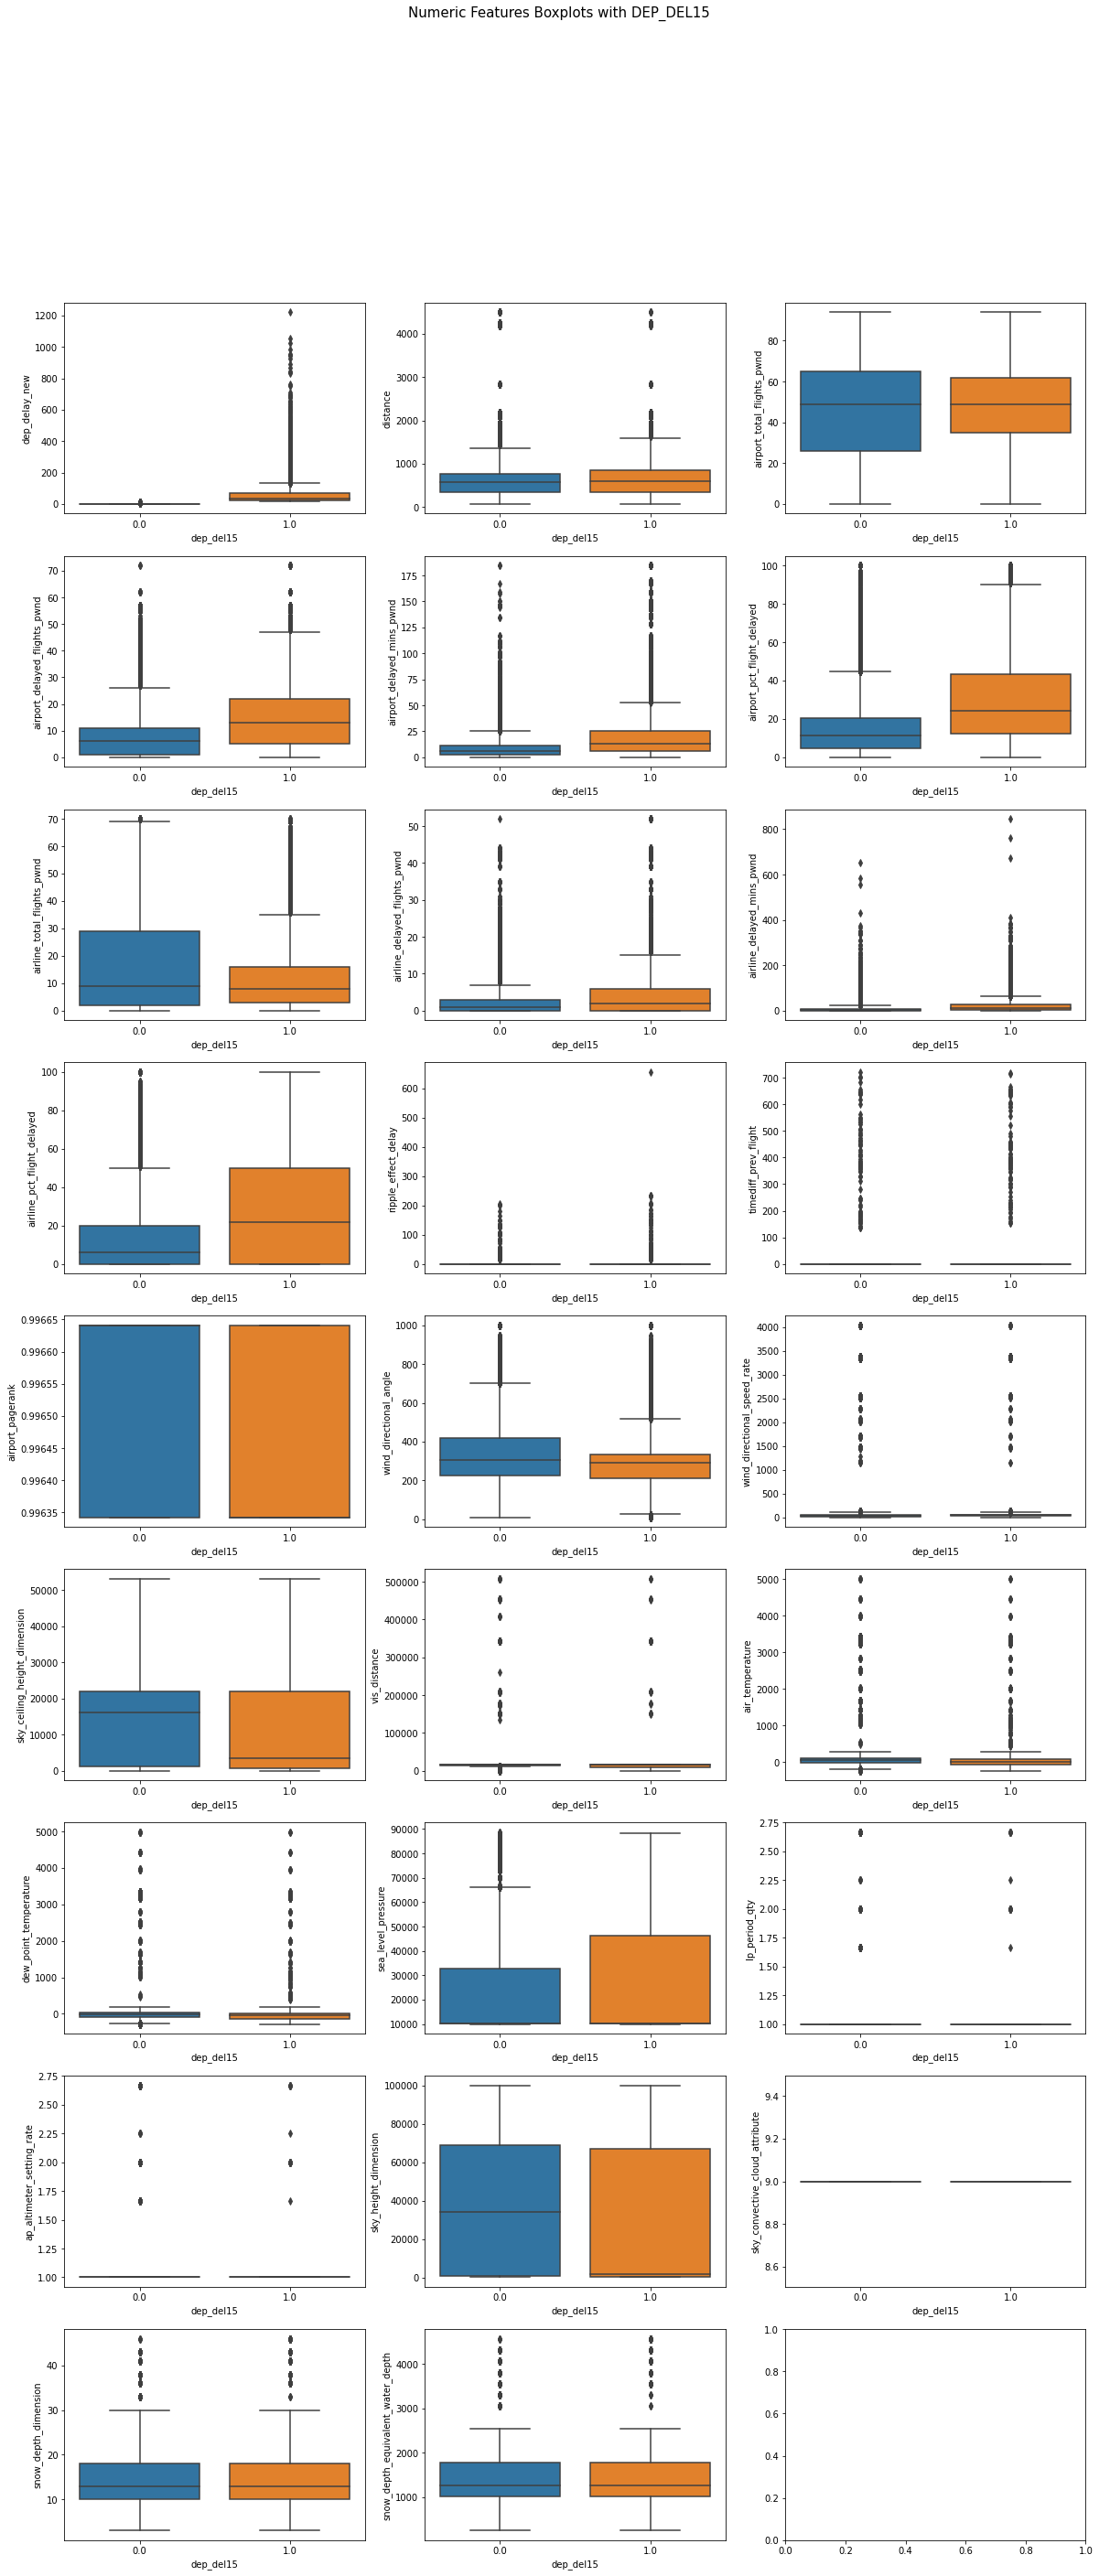

In [0]:
fig, ax = plt.subplots(9, 3, figsize=(20,45))
for idx, feature in enumerate(numeric_features):
    sns.boxplot(x='dep_del15', y=feature, data=df_airlines_weather_agg.toPandas(), ax=ax[idx//3,idx%3])
fig.suptitle("Numeric Features Boxplots with DEP_DEL15", fontsize=15)
plt.show()

In [0]:
fig, ax = plt.subplots(9, 3, figsize=(20,45))
for idx, feature in enumerate(numeric_features):
    sns.boxplot(x='dep_del15', y=feature, data=df_airlines_weather_agg.toPandas(), ax=ax[idx//3,idx%3])
fig.suptitle("Numeric Features Boxplots with DEP_DEL15", fontsize=15)
plt.show()

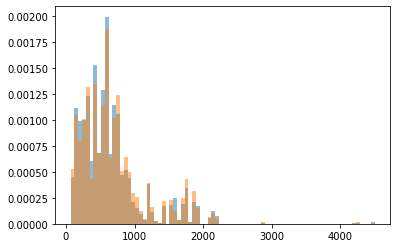

In [0]:
data_pd = df_airlines_weather_agg.toPandas()
plt.hist(data_pd[data_pd.dep_del15 == 0]['distance'], density = True, bins = 80, alpha = 0.5, label = 'Not Delayed')
plt.hist(data_pd[data_pd.dep_del15 == 1]['distance'], density = True, bins = 80, alpha = 0.5, label = 'Delayed')
plt.show()

In [0]:
df_airlines_weather_agg.toPandas()[df_airlines_weather_agg.toPandas().dep_del15 == 0]['distance']

Out[32]: 0 925.0
1 404.0
2 594.0
3 1587.0
4 594.0
 ... 
155914 258.0
155916 226.0
155918 516.0
155920 1027.0
155924 1846.0
Name: distance, Length: 119400, dtype: float64

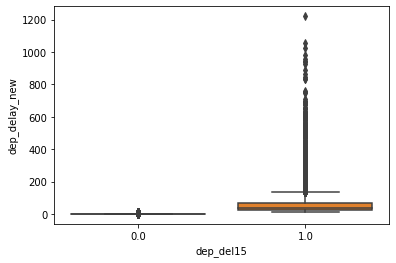

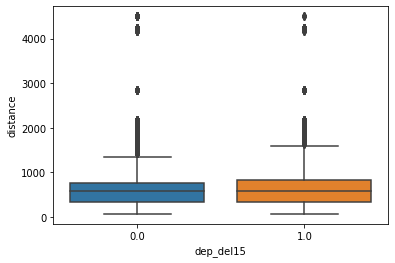

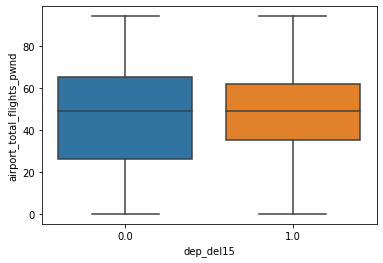

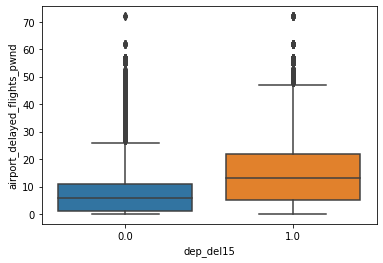

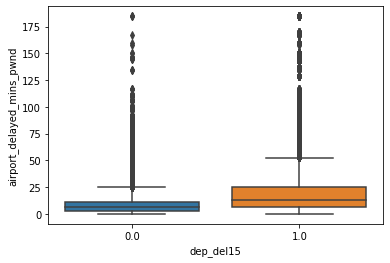

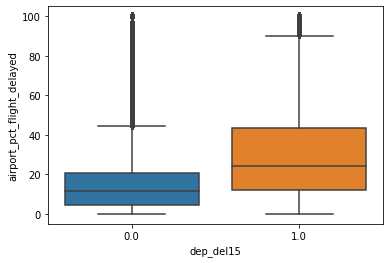

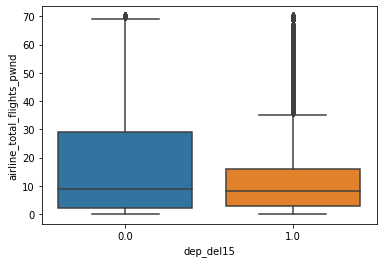

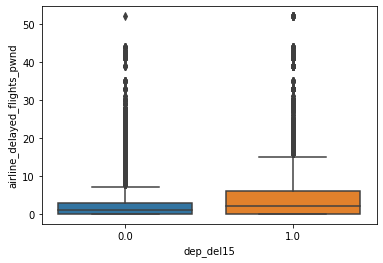

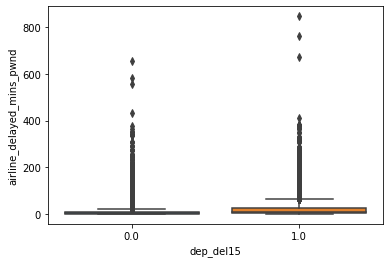

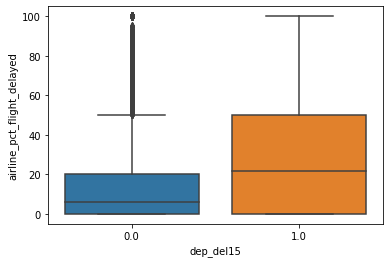

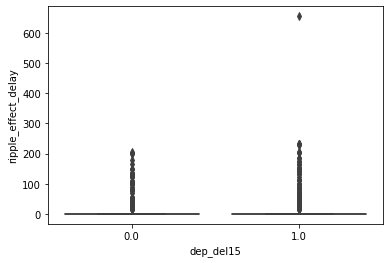

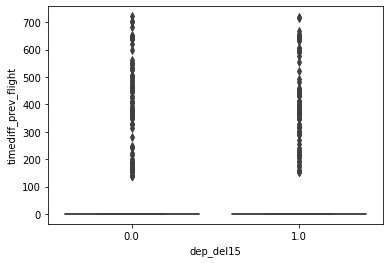

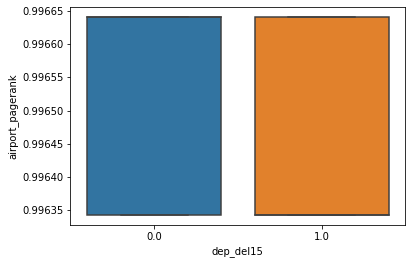

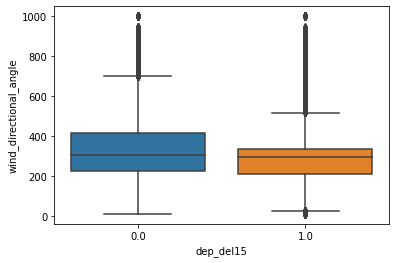

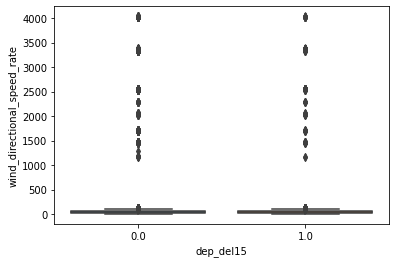

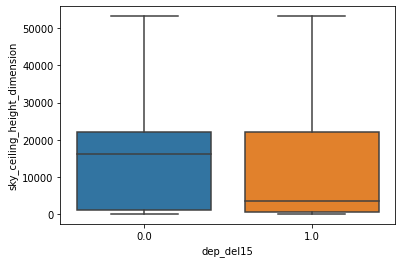

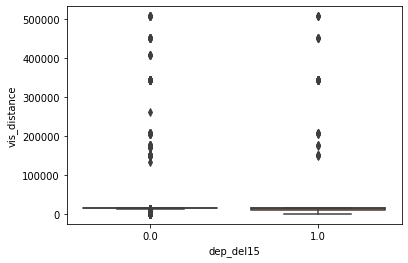

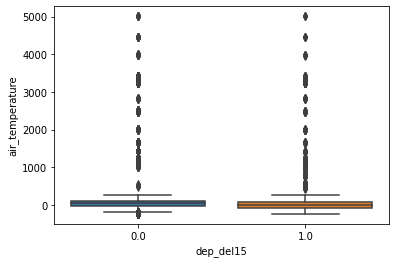

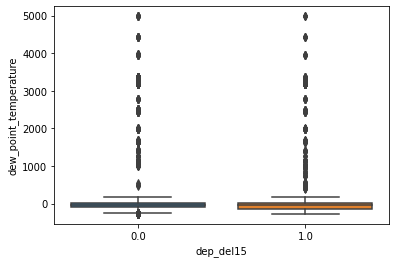

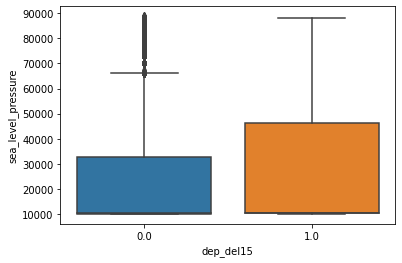

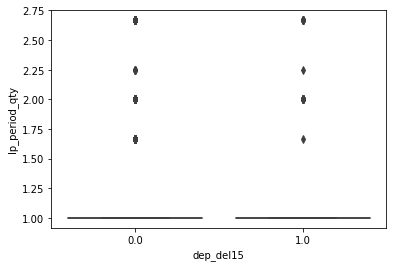

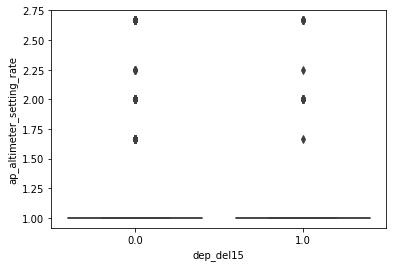

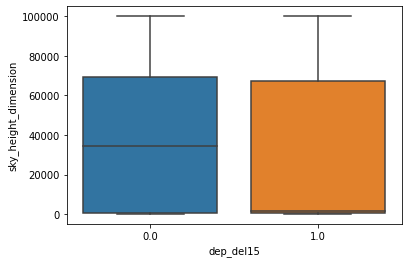

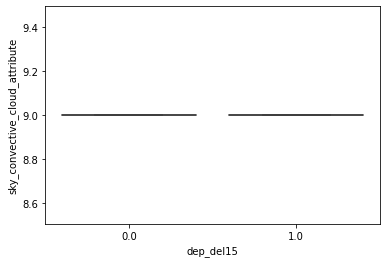

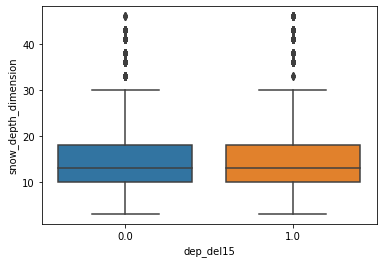

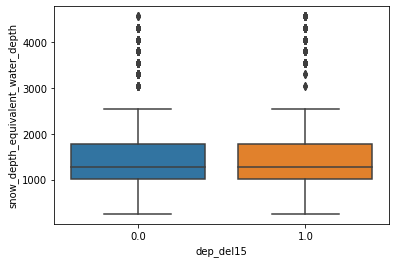

In [0]:
for feature in numeric_features:
    sns.boxplot(x='dep_del15',y=feature,data=df_airlines_weather_agg.toPandas())
    plt.show()

Out[105]:

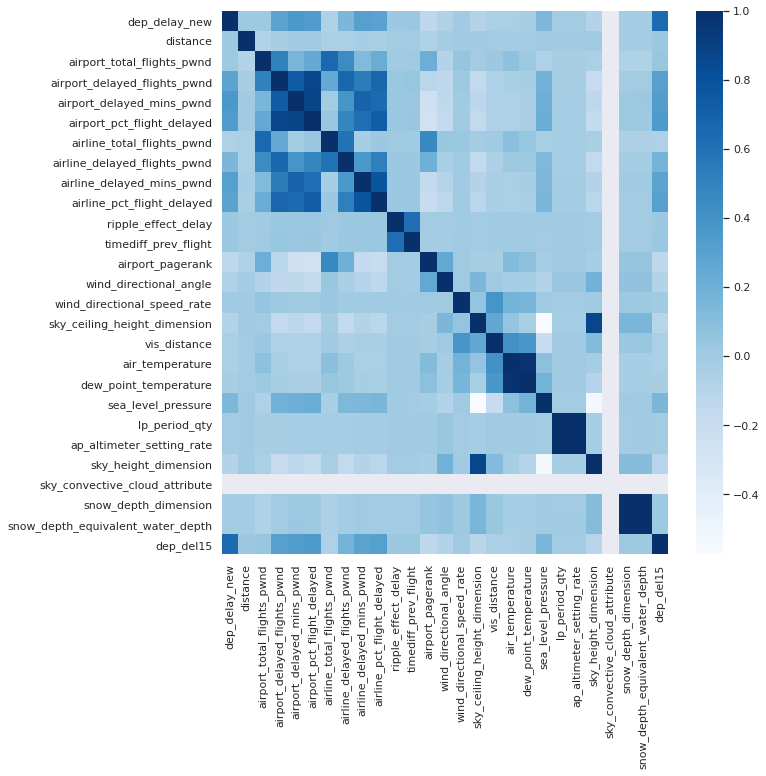

<AxesSubplot:>

In [0]:
# numeric_features.append('dep_del15')
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df_airlines_weather_agg.select(numeric_features).toPandas().corr(), cmap = "Blues")

### Date/Time Features

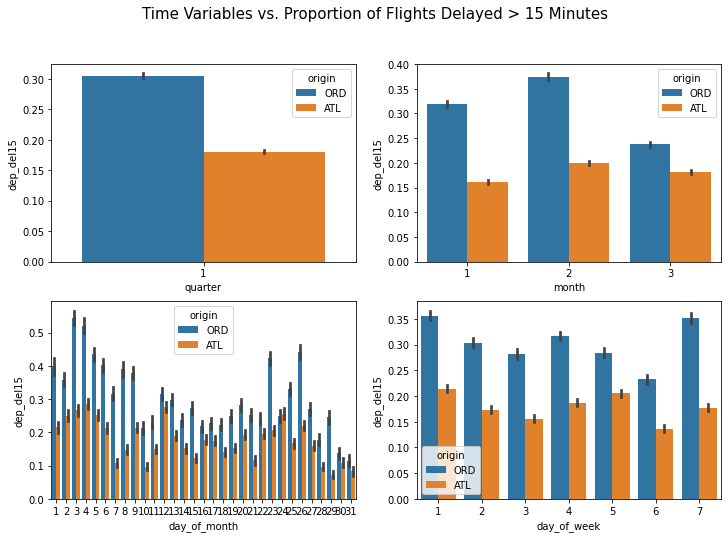

In [0]:
time_var = ["quarter", "month", "day_of_month", "day_of_week"]

fig, ax = plt.subplots(2, 2, figsize=(12,8))
for idx, feature in enumerate(time_var):
    sns.barplot(x=feature, y="dep_del15", data=airlines.toPandas(), hue="origin", ax=ax[idx//2][idx%2])
fig.suptitle("Time Variables vs. Proportion of Flights Delayed at Least 15 Minutes by Origin Airport", fontsize=15)
plt.show()

### Ripple Effect Analysis

In [0]:
display(airlines.filter(airlines.dep_del15 == 1).groupby(airlines.tail_num).count().orderBy("count", ascending=False))

tail_num count N620MQ 79 N650MQ 73 N602MQ 67 N709BR 66 N682MQ 65 N663MQ 65 N511MQ 64 N503MQ 64 N612MQ 63 N537MQ 60 N520MQ 60 N621MQ 60 N517MQ 60 N658MQ 59 N955SW 59 N688MQ 58 N539MQ 58 N531MQ 58 N656MQ 57 N689MQ 55 N942MQ 55 N988CA 54 N507MQ 54 N423SW 54 N506MQ 53 N648MQ 53 N606LR 53 N505MQ 53 N615MQ 52 N860AS 51 N515MQ 51 N522MQ 50 N873AS 50 N665MQ 50 N526MQ 49 N900EV 49 N523MQ 49 N952SW 48 N542MQ 47 N500MQ 47 N624MQ 47 N5PBMQ 46 N686BR 46 N527MQ 46 N868AS 46 N544MQ 45 N633MQ 45 N534MQ 45 N922EV 45 N867AS 45 N679MQ 45 N510MQ 45 N936DN 44 N119SY 44 N978AT 44 N498CA 44 N883AS 44 N528MQ 44 N986SW 44 N637MQ 44 N905MQ 43 N9EAMQ 43 N693BR 43 N963SW 42 N907MQ 42 N524MQ 42 N0EGMQ 42 N837AS 42 N618MQ 42 N138EV 42 N519MQ 42 N859AS 41 N923EV 41 N227FR 40 N6EAMQ 40 N920EV 40 N120SY 40 N857AS 39 N582CA 39 N655MQ 39 N691CA 39 N917EV 39 N619MQ 39 N902MQ 39 N698MQ 39 N855AS 39 N135EV 39 N919EV 39 N606MQ 38 N981DL 38 N925EV 38 N107SY 38 N209FR 38 N844AS 38 N916EV 38 N623MQ 38 N525US 38 N513MQ 38 N127SY 38 N501MQ 38 N906MQ 38 N934SW 38 N512MQ 38 N638MQ 38 N838AS 37 N914EV 37 N607LR 37 N108SY 37 N900MQ 37 N931EV 37 N843AS 37 N911DA 37 N902DA 36 N176PQ 36 N847AS 36 N881AS 36 N878AS 36 N853AS 36 N613MQ 36 N635MQ 36 N934AT 35 N518MQ 35 N861AS 35 N535MQ 35 N954DN 35 N909DA 35 N858AS 35 N118SY 35 N514MQ 35 N14923 35 N910DL 35 N608MQ 35 N850AS 34 N904DL 34 N641MQ 34 N114SY 34 N846AS 34 N122SY 34 N975DL 34 N854AS 34 N851AS 34 N35407 34 N984DL 34 N822MQ 34 N908DL 34 N906DL 34 N957DL 34 N990DL 34 N14573 34 N946DN 34 N117SY 33 N949DN 33 N629MQ 33 N925MQ 33 N926DH 33 N504MQ 33 N103SY 33 N871AS 33 N121SY 33 N952DL 33 N951DN 33 N110SY 33 N935AT 32 N856AS 32 N109SY 32 N981AT 32 N849MQ 32 N913DN 32 N26545 32 N978DL 32 N937EV 32 N852AS 32 N232PQ 32 N696MQ 32 N508MQ 32 N964DL 32 N905DL 32 N337NB 31 N994AT 31 N912DE 31 N882AS 31 N195PQ 31 N933EV 31 N939DN 31 N948DN 31 N955AT 31 N921DN 31 N992DL 31 N942DL 31 N944DN 31 N914DN 31 N953DN 31 N920DL 31 N933MQ 31 N979AT 30 N679SA 30 N124SY 30 N113SY 30 N916DN 30 N950DN 30 N29917 30 N228PQ 30 N839AS 30 N872AS 30 N912DL 30 N153PQ 30 N516MQ 30 N553NW 30 N968DL 30 N693MQ 30 N106SY 30 N521MQ 30 N901DE 30 N918DL 30 N952DN 30 N12563 30 N941DN 30 N636MQ 30 N15574 30 N959DL 29 N14998 29 N948SW 29 N991AT 29 N989DL 29 N968AT 29 N903DE 29 N514NK 29 N909DE 29 N931DL 29 N870AS 29 N980EV 29 N912DN 29 N979EV 29 N934DL 29 N639MQ 29 N893AT 29 N630MQ 29 N532NK 29 N961DN 29 N908DA 29 N994DL 29 N972DL 29 N8EGMQ 28 N319NB 28 N849AS 28 N990AT 28 N521NK 28 N914DL 28 N933AT 28 N940DN 28 N970DL 28 N903DA 28 N13908 28 N13553 28 N935DL 28 N125SY 28 N922DL 28 N15572 28 N632MQ 28 N922DX 28 N695CA 28 N543MQ 28 N927EV 27 N644MQ 27 N3MBAA 27 N960SW 27 N509MQ 27 N960DN 27 N814MQ 27 N3MEAA 27 N181PQ 27 N546MQ 27 N967DL 27 N13979 27 N840AS 27 N966AT 27 N927DN 27 N15980 27 N17560 27 N528CA 27 N519US 27 N694MQ 27 N986AT 26 N920DN 26 N3LJAA 26 N920AT 26 N938SW 26 N943DL 26 N502MQ 26 N910DN 26 N660MQ 26 N884AS 26 N502NK 26 N678CA 26 N116SY 26 N197PQ 26 N965DL 26 N948DL 26 N913SW 26 N959AT 26 N975AT 26 N13969 26 N921AT 26 N906DE 26 N924AT 26 N965DN 26 N15986 26 N12922 26 N683MQ 26 N128SY 26 N926AT 26 N842AS 25 N917DE 25 N960AT 25 N904DA 25 N674MQ 25 N995DL 25 N979SW 25 N15910 25 N662DN 25 N926EV 25 N970AT 25 N999DN 25 N919DL 25 N661MQ 25 N906DA 25 N982DL 25 N928DL 25 N907DL 25 N202FR 25 N925DN 25 N826MQ 25 N973DL 25 N523US 25 N13997 25 N525MQ 25 N930SW 25 N16918 24 N137EV 24 N843UA 24 N943DN 24 N947DN 24 N811UA 24 N925DL 24 N678MQ 24 N920DE 24 N13964 24 N662MQ 24 N510NK 24 N16919 24 N923DN 24 N12567 24 N937DL 24 N695MQ 24 N974EV 24 N3LXAA 24 N946DL 24 N530US 24 N939DL 24 N964DN 24 N16559 24 N933DL 24 N15983 24 N146PQ 24 N954DL 24 N758EV 24 N166PQ 24 N533US 24 N540US 24 N956DN 24 N552NW 24 N671MQ 24 N911DL 24 N611MQ 23 N905DE 23 N640MQ 23 N976SW 23 N976DL 23 N931DN 23 N919DN 23 N915DN 23 N204FR 23 N12540 23 N929DN 23 N985DL 23 N676CA 23 N998AT 23 N904DE 23 N3LGAA 23 N969DL 23 N817UA 23 N3LUAA 23 N818MQ 23 N924DN 23 N430UA 23 N921DL 23 N29906 23 N956DL 23 N3LRA

In [0]:
display(airlines.filter(airlines.tail_num == "N650MQ").orderBy("fl_date").select(["fl_date","crs_dep_time","dep_time","origin_icao","crs_arr_time","arr_time","dest_icao","dep_delay_new","dep_del15"]))

fl_date crs_dep_time dep_time origin_icao crs_arr_time arr_time dest_icao dep_delay_new dep_del15 2015-01-06 1015 1044 KORD 1228 1253 KCLE 29.0 1.0 2015-01-06 1955 2032 KORD 2155 2228 KTVC 37.0 1.0 2015-01-07 1310 1430 KORD 1357 1548 KCMI 80.0 1.0 2015-01-07 2040 2059 KORD 2310 2334 KTYS 19.0 1.0 2015-01-08 2105 2211 KORD 2311 126 KCVG 66.0 1.0 2015-01-08 1955 null KORD 2155 null KTVC null null 2015-01-08 1450 null KORD 1647 null KTUL null null 2015-01-08 835 921 KORD 940 1025 KEVV 46.0 1.0 2015-01-09 1215 1332 KORD 1431 1557 KCMH 77.0 1.0 2015-01-09 910 924 KORD 1056 1110 KAZO 14.0 0.0 2015-01-09 1710 1943 KORD 1845 2117 KSGF 153.0 1.0 2015-01-09 1215 null KORD 1438 null KPIT null null 2015-01-10 1015 1046 KORD 1228 1255 KCLE 31.0 1.0 2015-01-10 1630 1929 KORD 1736 2105 KLSE 179.0 1.0 2015-01-10 1330 null KORD 1547 null KDTW null null 2015-01-11 1235 1232 KORD 1342 1333 KLSE 0.0 0.0 2015-01-11 1630 1635 KORD 1736 1803 KLSE 5.0 0.0 2015-01-12 1450 1500 KORD 1625 1625 KSGF 10.0 0.0 2015-01-12 905 928 KORD 1138 1304 KCHA 23.0 1.0 2015-01-13 1235 1338 KORD 1342 1450 KLSE 63.0 1.0 2015-01-13 910 952 KORD 1056 1220 KAZO 42.0 1.0 2015-01-13 2125 2126 KORD 2214 2245 KCMI 1.0 0.0 2015-01-13 1615 1711 KORD 1807 1856 KFWA 56.0 1.0 2015-01-14 820 824 KORD 1016 1008 KLIT 4.0 0.0 2015-01-14 1615 1742 KORD 1824 1949 KCVG 87.0 1.0 2015-01-16 1915 1911 KORD 2003 2011 KBMI 0.0 0.0 2015-01-17 1700 1655 KORD 1747 1742 KCMI 0.0 0.0 2015-01-17 745 743 KORD 1011 1001 KBUF 0.0 0.0 2015-01-17 1215 1214 KORD 1431 1418 KCMH 0.0 0.0 2015-01-18 1625 1624 KORD 1741 1745 KDSM 0.0 0.0 2015-01-18 1215 1211 KORD 1438 1436 KPIT 0.0 0.0 2015-01-18 2150 2215 KORD 2343 43 KTOL 25.0 1.0 2015-01-18 805 758 KORD 915 914 KRST 0.0 0.0 2015-01-19 1615 1610 KORD 1807 1752 KFWA 0.0 0.0 2015-01-19 800 803 KORD 1019 1039 KDTW 3.0 0.0 2015-01-19 1920 1919 KORD 2055 2043 KSUX 0.0 0.0 2015-01-19 1220 1319 KORD 1309 1400 KPIA 59.0 1.0 2015-01-20 2020 2236 KORD 2200 34 KHSV 136.0 1.0 2015-01-20 1345 1340 KORD 1448 1508 KCWA 0.0 0.0 2015-01-20 1700 1800 KORD 1752 1839 KGRB 60.0 1.0 2015-01-20 905 905 KORD 1138 1135 KCHA 0.0 0.0 2015-01-21 2150 2145 KORD 2239 2242 KDBQ 0.0 0.0 2015-01-21 1440 1440 KORD 1613 1604 KSUX 0.0 0.0 2015-01-21 1005 1019 KORD 1055 1209 KDBQ 14.0 0.0 2015-01-22 850 857 KORD 1104 1113 KOKC 7.0 0.0 2015-01-22 1420 1423 KORD 1621 1625 KTVC 3.0 0.0 2015-01-22 2035 2101 KORD 2122 2148 KCMI 26.0 1.0 2015-01-23 1030 1024 KORD 1159 1157 KBNA 0.0 0.0 2015-01-23 2045 2050 KORD 2132 2129 KMSN 5.0 0.0 2015-01-24 1955 1947 KORD 2155 2147 KTVC 0.0 0.0 2015-01-24 1525 1526 KORD 1636 1632 KRST 1.0 0.0 2015-01-24 805 800 KORD 915 859 KRST 0.0 0.0 2015-01-24 1145 1139 KORD 1253 1236 KRST 0.0 0.0 2015-01-25 1120 1145 KORD 1321 1424 KFNT 25.0 1.0 2015-01-25 2030 2054 KORD 2224 2318 KFAR 24.0 1.0 2015-01-26 1005 1004 KORD 1055 1057 KDBQ 0.0 0.0 2015-01-26 1305 1307 KORD 1509 1540 KDAY 2.0 0.0 2015-01-26 2030 2100 KORD 2224 9 KFAR 30.0 1.0 2015-01-26 1645 1645 KORD 1842 1856 KIND 0.0 0.0 2015-01-27 2130 2125 KORD 2341 2351 KCMH 0.0 0.0 2015-01-27 1015 1015 KORD 1228 1227 KCLE 0.0 0.0 2015-01-28 1310 1305 KORD 1357 1347 KCMI 0.0 0.0 2015-01-28 2015 2010 KORD 2120 2107 KEVV 0.0 0.0 2015-01-28 735 738 KORD 826 825 KMSN 3.0 0.0 2015-01-28 1645 1641 KORD 1844 1831 KTOL 0.0 0.0 2015-01-28 1040 1038 KORD 1129 1119 KCMI 0.0 0.0 2015-01-29 1400 1358 KORD 1556 1556 KIND 0.0 0.0 2015-01-29 1905 1906 KORD 1954 1949 KCMI 1.0 0.0 2015-01-29 900 900 KORD 1059 1056 KTUL 0.0 0.0 2015-01-30 1030 1021 KORD 1159 1138 KBNA 0.0 0.0 2015-01-30 2045 2123 KORD 2132 2214 KMSN 38.0 1.0 2015-01-31 745 741 KORD 1011 1004 KBUF 0.0 0.0 2015-01-31 1215 1213 KORD 1431 1427 KCMH 0.0 0.0 2015-01-31 1620 1619 KORD 1723 1715 KCWA 0.0 0.0 2015-02-01 1145 null KORD 1401 null KDTW null null 2015-02-02 1420 1531 KORD 1621 1800 KTVC 71.0 1.0 2015-02-02 2215 null KORD 2331 null KDSM null null 2015-02-02 1215 null KORD 1438 null KPIT null null 2015-02-02 2015 null KORD 2120 null KEVV null null 2015-02-03 1525 null KORD 1

## Data Cleaning
- Outliers
- There might be duplicate rows in the big dataset
- [COMPLETE] Do not include columns whose information is only available within 2 hours of departure
- [COMPLETE] Select only relevant columns with information towards flight delays
- [COMPLETE] Remove columns whose data only exists
- [COMPLETE] Remove rows with nulls in flight times and cancelled
- [COMPLETE] Remove columns pertaining to diverted flights

## Feature Engineering Ideas

- Aircraft flights per day (running sum per day or total flights per day?)
- Airport outgoing flights per day (running sum per day or total flights per day?)
- Time between previous scheduled arrival time and scheduled departure time of aircraft
- Label weekend flights (higher traffic?)
- [stretch goal] Label holiday flights

## Numeric Features
- crs_elapsed_time
- distance
- dep_delay_new
- crs_dep_time, crs_arr_time
- dep_time, arr_time
- fl_tz
- total_flights (new derived feature for airports)
- delayed_flights (new derived feature for airports)
- avg_delayed_minutes (new derived feature for airports)
- pct_flight_delayed (new derived feature for airports)
- airline_total_flights (new derived feature for airlines)
- airline_delayed_flights (new derived feature for airlines)
- airline_avg_delayed_minutes (new derived feature for airlines)
- airline_pct_flight_delayed (new derived feature for airlines)
- prev_flight_arr_delay (new derived feature)
- timediff (new derived feature)
- pagerank (new derived feature)

## Categorical Features
- year, quarter, month, day_of_month, day_of_week
- origin, origin_airport_id, origin_state_abr, origin_city_name, origin_icao
- dest, dest_airport_id, dest_state_abr, dest_city_name, dest_icao
- time_zone
- op_unique_carrier, op_carrier_airline_id, op_carrier_fl_num
- tail_num
- dep_time_blk, arr_time_blk
- distance_group
- dep_del15

In [0]:
display(airlines)


year quarter month day_of_month day_of_week fl_date time_zone origin origin_icao origin_city_name origin_airport_id origin_state_abr dest_airport_id dest_state_abr dest_city_name dest dest_icao op_unique_carrier op_carrier_airline_id op_carrier_fl_num tail_num dep_time_blk arr_time_blk crs_dep_time crs_arr_time crs_elapsed_time distance distance_group dep_delay_new dep_del15 dep_time arr_time fl_tz 2015 1 2 1 7 2015-02-01 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MEAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 19.0 1.0 749 1100 2015-02-01T13:30:00.000+0000 2015 1 2 2 1 2015-02-02 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LPAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 null null null null 2015-02-02T13:30:00.000+0000 2015 1 2 3 2 2015-02-03 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LXAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 5.0 0.0 735 1036 2015-02-03T13:30:00.000+0000 2015 1 2 4 3 2015-02-04 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LHAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 727 1013 2015-02-04T13:30:00.000+0000 2015 1 2 5 4 2015-02-05 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LYAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 27.0 1.0 757 1101 2015-02-05T13:30:00.000+0000 2015 1 2 6 5 2015-02-06 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LVAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 723 1011 2015-02-06T13:30:00.000+0000 2015 1 2 8 7 2015-02-08 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MAAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 728 1018 2015-02-08T13:30:00.000+0000 2015 1 2 9 1 2015-02-09 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MGAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 37.0 1.0 807 1058 2015-02-09T13:30:00.000+0000 2015 1 2 10 2 2015-02-10 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LTAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 722 1030 2015-02-10T13:30:00.000+0000 2015 1 2 11 3 2015-02-11 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LVAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 724 1100 2015-02-11T13:30:00.000+0000 2015 1 2 12 4 2015-02-12 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LNAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 730 1028 2015-02-12T13:30:00.000+0000 2015 1 2 13 5 2015-02-13 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3JDAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 730 1047 2015-02-13T13:30:00.000+0000 2015 1 2 15 7 2015-02-15 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LXAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 null null null null 2015-02-15T13:30:00.000+0000 2015 1 2 16 1 2015-02-16 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LVAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 728 1016 2015-02-16T13:30:00.000+0000 2015 1 2 17 2 2015-02-17 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MEAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 16.0 1.0 746 1047 2015-02-17T13:30:00.000+0000 2015 1 2 18 3 2015-02-18 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LGAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 724 1022 2015-02-18T13:30:00.000+0000 2015 1 2 19 4 2015-02-19 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LPAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 1.0 0.0 731 1056 2015-02-19T13:30:00.000+0000 2015 1 2 

## Weather Data Exploration

In [0]:
'''
Numerical Features

Wind Directional Angle 
    - The angle, measured in a clockwise direction, 
    between true north and the direction from which the wind is blowing 
    - Unit: Angular Degrees
    
Wind Directional Speed Rate 
    - The rate of horizontal travel of air past a fixed point
    - Unit: meters per second

Sky Ceiling Height Dimension
    - The height above ground level (AGL) of the lowest cloud or obscuring 
    phenomena layer aloft with 5/8 or more summation total sky
    cover, which may be predominantly opaque, or the vertical 
    visibility into a surface-based obstruction. Unlimited = 22000

Visibility Distance Dimension
    - The horizontal distance at which an object can be seen and identified
    - Unit: meters (min = 0 , max = 160000) 
    - Values > 160000 are entered as 160000

Air Temperature

Dew Point Temperature

Sea Level Pressure

Liquid Precipitation Period Quantity

Atmospheric Pressure Altimeter Setting Rate


'''

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.sql import SQLContext
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, max

sqlContext = SQLContext(sc)

In [0]:
# Configuration for Blob Storage 

blob_container = "container1" # The name of your container created in https://portal.azure.com
storage_account = "w261sp22team12" # The name of your Storage account created in https://portal.azure.com
secret_scope = "s1" # The name of the scope created in your local computer using the Databricks CLI
secret_key = "k1" # The name of the secret key created in your local computer using the Databricks CLI 
blob_url = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"
mount_path = "/mnt/mids-w261"

In [0]:
# SAS Token
spark.conf.set(
  f"fs.azure.sas.{blob_container}.{storage_account}.blob.core.windows.net",
  dbutils.secrets.get(scope = secret_scope, key = secret_key)
)

In [0]:
def sparkShape(dataFrame):
    return (dataFrame.count(), len(dataFrame.columns))

In [0]:
spark

Out[6]:

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.1.2 
 Master 
 spark://10.139.64.33:7077 
 AppName 
 Databricks Shell

In [0]:
df_weather = spark.read.parquet(f"{blob_url}/weather")
df_weather.createOrReplaceTempView('weather')

In [0]:
display(df_weather)

station country date latitude longitude report_type call_sign wnd cig vis tmp dew slp ga1 ge1 gf1 gd1 aa1 aj1 at1 ia1 ma1 wind_directional_angle wind_directional_qc wind_directional_type_code wind_directional_speed_rate wind_directional_speed_qc sky_ceiling_height_dimension sky_ceiling_qc sky_ceiling_determination_code sky_ceiling_cavok_code vis_distance vis_distance_qc vis_variability_code vis_variability_qc air_temperature air_temperature_qc dew_point_temperature dew_point_qc sea_level_pressure sea_level_pressure_qc lp_period_qty lp_depth_dimension lp_condition_code lp_quality_code ap_altimeter_setting_rate ap_altimeter_qc ap_station_pressure_rate ap_station_pressure_qc sky_coverage_code sky_coverage_code_2 sky_coverage_qc sky_height_dimension sky_height_dimension_qc sky_characteristic_code sky_convective_cloud_attribute sky_vertical_datum_attribute sky_base_height_upper_range_attribute sky_base_height_lower_range_attribute ground_observation_code ground_observation_qc snow_depth_dimension snow_depth_condition_code snow_depth_qc snow_depth_equivalent_water_depth snow_depth_water_condition_code snow_depth_water_qc weather_obs_source_element weaher_obs_weather_type_num weather_obs_weather_type_abb snow_depth_equivalent_qc 72234654824 US 2015-01-01T00:35:00.000+0000 42.99306 -84.13889 FM-15 99999 220,1,N,0062,1 22000,1,9,N 016093,1,9,9 -0090,1 -0150,1 99999,9 00,99,1,99,9,99,9,99999,9,99,9,99,9 10190,1,99999,9 220 1 N 0062 1 22000 1 9 N 016093 1 9 9 -0090 1 -0150 1 99999 9 null null null null null null null null null null null null null null null null null null null null null null null 72234654824 US 2015-01-01T00:55:00.000+0000 42.99306 -84.13889 FM-15 99999 220,1,N,0062,1 22000,5,9,N 016093,1,9,9 -0090,1 -0150,1 99999,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,00945,1,99,9,99,9 2,99,1,+00945,1,9 10183,1,99999,9 220 1 N 0062 1 22000 5 9 N 016093 1 9 9 -0090 1 -0150 1 99999 9 null null null null null null 2 99 1 +00945 1 9 9 AGL +99999 +99999 null null null null null null null null null 72234654824 US 2015-01-01T01:15:00.000+0000 42.99306 -84.13889 FM-15 99999 220,1,N,0051,1 01006,1,9,N 016093,1,9,9 -0087,1 -0155,1 99999,9 9,AGL ,+99999,+99999 99,99,9,99,9,99,9,01006,1,99,9,99,9 3,99,1,+01006,1,9 10179,1,99999,9 220 1 N 0051 1 01006 1 9 N 016093 1 9 9 -0087 1 -0155 1 99999 9 null null null null null null 3 99 1 +01006 1 9 9 AGL +99999 +99999 null null null null null null null null null 72234654824 US 2015-01-01T01:35:00.000+0000 42.99306 -84.13889 FM-15 99999 230,1,N,0077,1 22000,5,9,N 016093,1,9,9 -0089,1 -0160,1 99999,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,01006,1,99,9,99,9 2,99,1,+01006,1,9 10179,1,99999,9 230 1 N 0077 1 22000 5 9 N 016093 1 9 9 -0089 1 -0160 1 99999 9 null null null null null null 2 99 1 +01006 1 9 9 AGL +99999 +99999 null null null null null null null null null 72234654824 US 2015-01-01T01:55:00.000+0000 42.99306 -84.13889 FM-15 99999 230,1,N,0067,1 22000,5,9,N 016093,1,9,9 -0087,1 -0162,1 99999,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,01006,1,99,9,99,9 2,99,1,+01006,1,9 10176,1,99999,9 230 1 N 0067 1 22000 5 9 N 016093 1 9 9 -0087 1 -0162 1 99999 9 null null null null null null 2 99 1 +01006 1 9 9 AGL +99999 +99999 null null null null null null null null null 72234654824 US 2015-01-01T02:14:00.000+0000 42.99306 -84.13889 FM-15 99999 230,1,N,0072,1 22000,5,9,N 016093,1,9,9 -0087,1 -0159,1 99999,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,01372,1,99,9,99,9 2,99,1,+01372,1,9 10176,1,99999,9 230 1 N 0072 1 22000 5 9 N 016093 1 9 9 -0087 1 -0159 1 99999 9 null null null null null null 2 99 1 +01372 1 9 9 AGL +99999 +99999 null null null null null null null null null 72234654824 US 2015-01-01T02:35:00.000+0000 42.99306 -84.13889 FM-15 99999 230,1,N,0093,1 22000,5,9,N 016093,1,9,9 -0085,1 -0153,1 99999,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,01372,1,99,9,99,9 2,99,1,+01372,1,9 10173,1,99999,9 230 1 N 0093 1 22000 5 9 N 016093 1 9 9 -0085 1 -0153 1 99999 9 null null null null null null 2 99 1 +01372 1 9 9 AGL +9999

In [0]:

'''
[FIX]
Problem: There are leading zeros in numerical values of the dataset
Solution: Use regex to remove leading zeros

[FIX]
Problem: There is a leading "+" or "-" before the number, AND leading zeros
Solution: Use regex extract sign, then remove zeros, then multiply -1 or 1 to value.
'''

def weather_v2(weather_data):
    return (
        weather_data
            .withColumn('wind_speed_rate_mps', 
                        F.regexp_replace('wind_directional_speed_rate', r'^[0]*', ''))
            .withColumn('sky_ceiling_height_m',
                        F.regexp_replace('sky_ceiling_height_dimension', r'^[0]*', ''))
            .withColumn('vis_distance_m',
                        F.regexp_replace('vis_distance', r'^[0]*', ''))

            # TODO: add indicator for plus-minus before value 
            .withColumn('air_temp_c',
                        F.regexp_replace('air_temperature', r'^[-+][0]*', ''))
            .withColumn('dew_point_temp_c',
                        F.regexp_replace('dew_point_temperature', r'^[-+][0]*', ''))
    )


df_weather_v2 = weather_v2(df_weather)



In [0]:
display(df_weather_v2)

station country date latitude longitude report_type call_sign wnd cig vis tmp dew slp ga1 ge1 gf1 gd1 aa1 aj1 at1 ia1 ma1 wind_directional_angle wind_directional_qc wind_directional_type_code wind_directional_speed_rate wind_directional_speed_qc sky_ceiling_height_dimension sky_ceiling_qc sky_ceiling_determination_code sky_ceiling_cavok_code vis_distance vis_distance_qc vis_variability_code vis_variability_qc air_temperature air_temperature_qc dew_point_temperature dew_point_qc sea_level_pressure sea_level_pressure_qc lp_period_qty lp_depth_dimension lp_condition_code lp_quality_code ap_altimeter_setting_rate ap_altimeter_qc ap_station_pressure_rate ap_station_pressure_qc sky_coverage_code sky_coverage_code_2 sky_coverage_qc sky_height_dimension sky_height_dimension_qc sky_characteristic_code sky_convective_cloud_attribute sky_vertical_datum_attribute sky_base_height_upper_range_attribute sky_base_height_lower_range_attribute ground_observation_code ground_observation_qc snow_depth_dimension snow_depth_condition_code snow_depth_qc snow_depth_equivalent_water_depth snow_depth_water_condition_code snow_depth_water_qc weather_obs_source_element weaher_obs_weather_type_num weather_obs_weather_type_abb snow_depth_equivalent_qc wind_speed_rate_mps sky_ceiling_height_m vis_distance_m air_temp_c dew_point_temp_c 72234654824 US 2015-01-01T00:35:00.000+0000 42.99306 -84.13889 FM-15 99999 220,1,N,0062,1 22000,1,9,N 016093,1,9,9 -0090,1 -0150,1 99999,9 00,99,1,99,9,99,9,99999,9,99,9,99,9 10190,1,99999,9 220 1 N 0062 1 22000 1 9 N 016093 1 9 9 -0090 1 -0150 1 99999 9 null null null null null null null null null null null null null null null null null null null null null null null 62 22000 16093 90 150 72234654824 US 2015-01-01T00:55:00.000+0000 42.99306 -84.13889 FM-15 99999 220,1,N,0062,1 22000,5,9,N 016093,1,9,9 -0090,1 -0150,1 99999,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,00945,1,99,9,99,9 2,99,1,+00945,1,9 10183,1,99999,9 220 1 N 0062 1 22000 5 9 N 016093 1 9 9 -0090 1 -0150 1 99999 9 null null null null null null 2 99 1 +00945 1 9 9 AGL +99999 +99999 null null null null null null null null null 62 22000 16093 90 150 72234654824 US 2015-01-01T01:15:00.000+0000 42.99306 -84.13889 FM-15 99999 220,1,N,0051,1 01006,1,9,N 016093,1,9,9 -0087,1 -0155,1 99999,9 9,AGL ,+99999,+99999 99,99,9,99,9,99,9,01006,1,99,9,99,9 3,99,1,+01006,1,9 10179,1,99999,9 220 1 N 0051 1 01006 1 9 N 016093 1 9 9 -0087 1 -0155 1 99999 9 null null null null null null 3 99 1 +01006 1 9 9 AGL +99999 +99999 null null null null null null null null null 51 1006 16093 87 155 72234654824 US 2015-01-01T01:35:00.000+0000 42.99306 -84.13889 FM-15 99999 230,1,N,0077,1 22000,5,9,N 016093,1,9,9 -0089,1 -0160,1 99999,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,01006,1,99,9,99,9 2,99,1,+01006,1,9 10179,1,99999,9 230 1 N 0077 1 22000 5 9 N 016093 1 9 9 -0089 1 -0160 1 99999 9 null null null null null null 2 99 1 +01006 1 9 9 AGL +99999 +99999 null null null null null null null null null 77 22000 16093 89 160 72234654824 US 2015-01-01T01:55:00.000+0000 42.99306 -84.13889 FM-15 99999 230,1,N,0067,1 22000,5,9,N 016093,1,9,9 -0087,1 -0162,1 99999,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,01006,1,99,9,99,9 2,99,1,+01006,1,9 10176,1,99999,9 230 1 N 0067 1 22000 5 9 N 016093 1 9 9 -0087 1 -0162 1 99999 9 null null null null null null 2 99 1 +01006 1 9 9 AGL +99999 +99999 null null null null null null null null null 67 22000 16093 87 162 72234654824 US 2015-01-01T02:14:00.000+0000 42.99306 -84.13889 FM-15 99999 230,1,N,0072,1 22000,5,9,N 016093,1,9,9 -0087,1 -0159,1 99999,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,01372,1,99,9,99,9 2,99,1,+01372,1,9 10176,1,99999,9 230 1 N 0072 1 22000 5 9 N 016093 1 9 9 -0087 1 -0159 1 99999 9 null null null null null null 2 99 1 +01372 1 9 9 AGL +99999 +99999 null null null null null null null null null 72 22000 16093 87 159 72234654824 US 2015-01-01T02:35:00.000+0000 42.99306 -84.13889 FM-15 99999 230,1,N,0093,1 22000,5,9,N 016093,1,9,9 -0085,1 -0153,1 99999,9

In [0]:

# Create a second temp table just for EDA
df_weather_v2.createOrReplaceTempView('weather_v2')


In [0]:
# Histogram Function: column and threshold to filter

def create_histogram(
        column, threshold=None, 
        table_view='weather_v2',
        figsize=(10,10), bins=50): 
    '''
    Function to create histogram from weather dataset
    given parameters like column and threshold to avoid 
    extraneous values such as `99999`
    '''
    
    query_hist = f'''
        SELECT DOUBLE({column})AS {column}
        FROM {table_view}
        WHERE {column} < {threshold}
    '''
    
    df_hist = spark.sql(query_hist)
    df_hist = df_hist.toPandas()
    df_hist.hist(figsize=(5,5), bins=50)
    plt.show()


In [0]:
'''
Ideas: 

Timeseries
- Average air temperature over time
- Average dew point temperature over time

Histogram
- all numerical values that make sense
- LAT/LONG do not make sense as a histogram, unless I want to see distribution of location?
- Rather use a map instead
'''

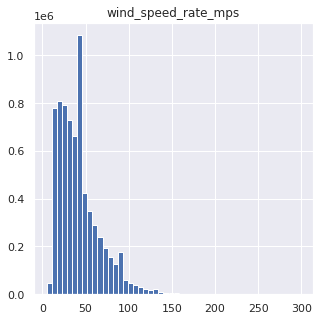

In [0]:
create_histogram(column='wind_speed_rate_mps', threshold=300)

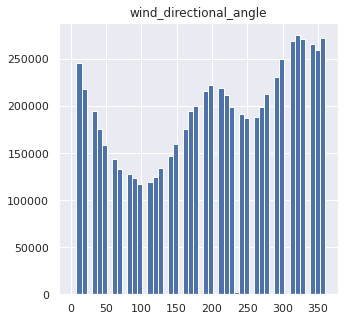

In [0]:
create_histogram(column='wind_directional_angle', threshold=361, bins=30)

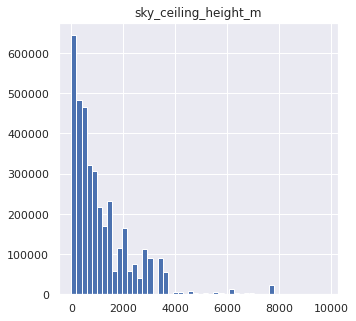

In [0]:
create_histogram(column='sky_ceiling_height_m', threshold=9999)

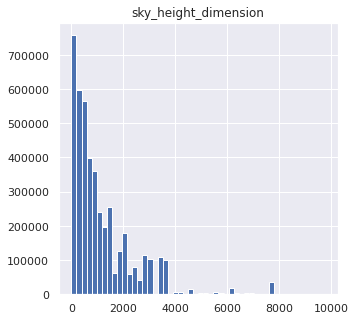

In [0]:
create_histogram(column='sky_height_dimension', threshold=10000)

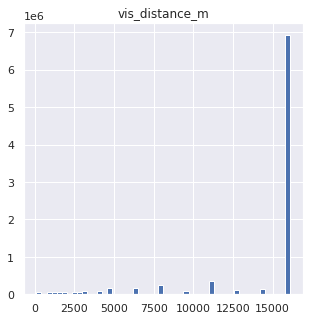

In [0]:

# It seems like most flights put 16000 as visible distance if sky
create_histogram(column='vis_distance_m', threshold=17500)

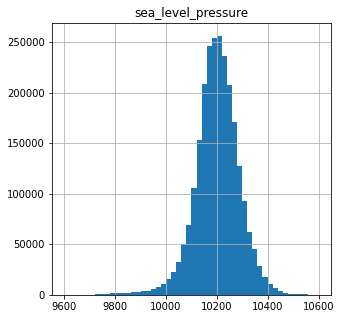

In [0]:
create_histogram(column='sea_level_pressure', threshold=20000)

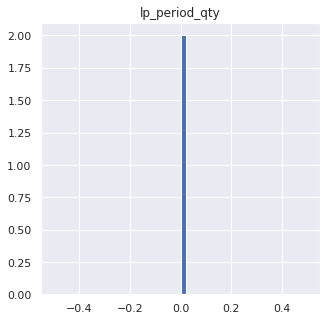

In [0]:
create_histogram(column='lp_period_qty', threshold=0.5, bins=1000)

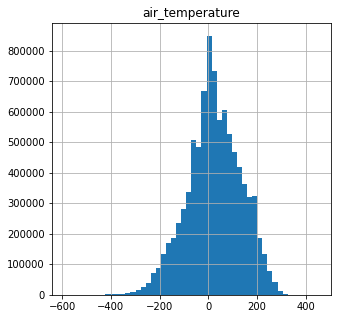

In [0]:
create_histogram(column='air_temperature', threshold=1000, bins=200)

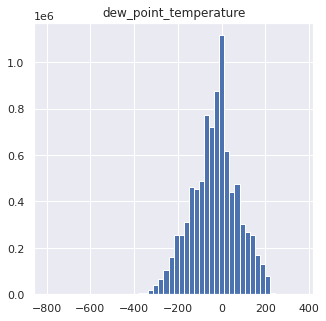

In [0]:
create_histogram(column='dew_point_temperature', threshold=1000, bins=50)

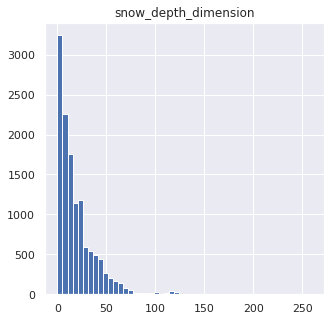

In [0]:
create_histogram(column='snow_depth_dimension', threshold=1000, bins=1000)

### Airlines Aggregated -- Dataset Used for Baseline Modeling

In [0]:
df_airlines_weather_agg = spark.read.parquet(f"{blob_url}/airlines_agg")
df_airlines_weather_agg.createOrReplaceTempView('airlines_agg')

In [0]:
# Show columns of df_airlines_weather_agg
display(df_airlines_weather_agg)

fl_tz origin_icao tail_num fl_date dep_del15 dep_delay_new distance airport_total_flights_pwnd airport_delayed_flights_pwnd airport_delayed_mins_pwnd airport_pct_flight_delayed airline_total_flights_pwnd airline_delayed_flights_pwnd airline_delayed_mins_pwnd airline_pct_flight_delayed ripple_effect_delay timediff_prev_flight airport_pagerank wind_directional_angle wind_directional_speed_rate sky_ceiling_height_dimension vis_distance air_temperature dew_point_temperature sea_level_pressure lp_period_qty ap_altimeter_setting_rate sky_height_dimension sky_convective_cloud_attribute snow_depth_dimension snow_depth_equivalent_water_depth 2015-01-01T11:10:00.000+0000 KORD N30401 2015-01-01 0.0 4.0 925.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9963424134894684 246.66666666666666 67.0 22000.0 16093.0 -90.66666666666667 -154.0 10199.333333333334 1.0 1.0 99999.0 null null null 2015-01-01T11:55:00.000+0000 KATL N555NW 2015-01-01 0.0 0.0 404.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 776.0 12.0 22000.0 13947.666666666666 5.666666666666667 -29.666666666666668 10273.333333333334 1.0 1.0 68698.0 9.0 null null 2015-01-01T12:30:00.000+0000 KATL N960DN 2015-01-01 0.0 0.0 594.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 776.0 12.0 22000.0 13947.666666666666 5.666666666666667 -29.666666666666668 10273.333333333334 1.0 1.0 68698.0 9.0 null null 2015-01-01T12:45:00.000+0000 KATL N554UW 2015-01-01 0.0 0.0 1587.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 776.0 12.0 22000.0 13947.666666666666 5.666666666666667 -29.666666666666668 10273.333333333334 1.0 1.0 68698.0 9.0 null null 2015-01-01T13:15:00.000+0000 KATL N015AA 2015-01-01 0.0 0.0 594.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T13:25:00.000+0000 KATL N562WN 2015-01-01 0.0 1.0 591.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T13:40:00.000+0000 KATL N947DN 2015-01-01 0.0 0.0 666.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T13:45:00.000+0000 KATL N551WN 2015-01-01 0.0 0.0 762.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T13:50:00.000+0000 KATL N3744F 2015-01-01 1.0 17.0 946.0 1.0 1.0 16.0 100.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 5.0 22000.0 12874.666666666666 -3.6666666666666665 -29.666666666666668 10273.0 1.0 1.0 69206.0 9.0 null null 2015-01-01T14:04:00.000+0000 KATL N374DA 2015-01-01 0.0 0.0 594.0 4.0 1.0 4.75 25.0 2.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 10.333333333333334 22000.0 15020.333333333334 -3.6666666666666665 -35.0 10279.333333333334 1.0 1.0 69206.0 9.0 null null 2015-01-01T14:08:00.000+0000 KORD N958SW 2015-01-01 0.0 0.0 224.0 7.0 1.0 3.714286 14.285714285714286 0.0 0.0 0.0 0.0 0.0 0.0 0.9963424134894684 230.0 66.66666666666667 22000.0 16093.0 -96.0 -148.0 10183.0 1.0 1.0 99999.0 null null null 2015-01-01T14:10:00.000+0000 KATL N924DN 2015-01-01 0.0 0.0 581.0 4.0 1.0 4.75 25.0 2.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 10.333333333333334 22000.0 15020.333333333334 -3.6666666666666665 -35.0 10279.333333333334 1.0 1.0 69206.0 9.0 null null 2015-01-01T14:15:00.000+0000 KATL N935AT 2015-01-01 0.0 0.0 782.0 4.0 1.0 4.75 25.0 2.0 0.0 0.0 0.0 0.0 0.0 0.9966407108467105 769.3333333333334 10.333333333333334 22000.0 15020.333333333334 -3.6666666666666665 -35.0 10279.333333333334 1.0 1.0 69206.0 9.0 null null 2015-01-01T14:26:00.000+0000 KATL N504NK 2015-01-01 0.0 

In [0]:
%sql

WITH base_data AS (
  SELECT 
    CASE 
      WHEN dep_del15 = 0 THEN 'Not Delayed'
      WHEN dep_del15 = 1 THEN 'Delayed'
      ELSE NULL 
    END AS is_delayed,
    dep_del15, 
    dep_delay_new AS minutes_delayed,
    fl_date AS flight_date, 
    origin_icao AS origin_airport,

    -- Weather Data
    air_temperature / 10.0 AS air_temperature,
    dew_point_temperature / 10.0 AS dew_point_temperature,
    wind_directional_speed_rate,
    vis_distance AS vis_distance_m,
    CASE
      WHEN vis_distance < 159000  THEN 'Not Visible'
      WHEN vis_distance >= 159000 THEN 'Visible'
      ELSE NULL
      END AS vis_distance_binary,
    sea_level_pressure
  
  FROM airlines_agg
)

SELECT
  -- DATE_TRUNC('day', flight_date)::DATE AS flight_date,
  is_delayed, 
  ROUND(AVG(sea_level_pressure),2) AS avg_slp,
  ROUND(MAX(sea_level_pressure),2) AS max_slp,
  ROUND(MIN(sea_level_pressure),2) AS min_slp,
  ROUND(PERCENTILE_APPROX(sea_level_pressure, 0.5),2) AS median_slp
  -- PERCENTILE_APPROX(minutes_delayed, 0.5) AS median_minutes_delayed
FROM base_data
WHERE sea_level_pressure <= 20000
GROUP BY is_delayed
-- GROUP BY 1
-- ORDER BY 1


is_delayed avg_slp max_slp min_slp median_slp Not Delayed 10227.35 10440.0 10025.67 10227.0 Delayed 10245.65 10440.0 10025.67 10247.0

In [0]:
%sql 

WITH base_data AS (
  SELECT 
    CASE 
      WHEN dep_del15 = 0 THEN 'Not Delayed'
      WHEN dep_del15 = 1 THEN 'Delayed'
      ELSE NULL 
    END AS is_delayed,
    
    dep_del15, 
    dep_delay_new AS minutes_delayed,
    fl_tz
    fl_date AS flight_date, 
    origin_icao AS origin_airport
  
  FROM airlines_agg
)


SELECT
  DATE_TRUNC('hour', fl_tz)::DATE
  , COUNT(*) AS n_flights
  , SUM(CASE WHEN dep_del15 = 1 THEN 1 ELSE 0 END) AS n_delayed_flights
  , 
FROM base_data


In [0]:
df_airlines = spark.read.parquet(f"{blob_url}/airlines")
df_airlines.createOrReplaceTempView('airlines')

In [0]:
# find the 1 hour departure time blocks, prediction window time block and date. 
# prediction window time block is the 1 hour block before the 2 hours of scheduled departuer

def toDepatureBlock(ts):
    blk_ts = ts
    hours = hour(blk_ts)
    return when(hours < 10, F.format_string('0%d00-0%d59', hours, hours)).when(hours >= 10, F.format_string('%d00-%d59', hours, hours))

def toPredictionWindowDate(ts):
    blk_ts = ts - F.expr('INTERVAL 3 hours')
    return date_format(blk_ts, 'yyyy-MM-dd')
    
def toPredictionWindowBlock(ts):
    blk_ts = ts - F.expr('INTERVAL 3 hours')    
    hours = hour(blk_ts)
    return when(hours < 10, F.format_string('0%d00-0%d59', hours, hours)).when(hours >= 10, F.format_string('%d00-%d59', hours, hours))

spark.udf.register('toDepatureBlock', toDepatureBlock)
spark.udf.register('toPredictionWindowDate', toPredictionWindowDate)
spark.udf.register('toPredictionWindowBlock', toPredictionWindowBlock)

df_airlines_blk_delay = df_airlines.withColumn('pwnd_date', toPredictionWindowDate(col('local_tz'))) \
                                   .withColumn('pwnd_blk', toPredictionWindowBlock(col('local_tz'))) \
                                   .withColumn('dwnd_blk', toDepatureBlock(col('local_tz')))

display(df_airlines_blk_delay)

year quarter month day_of_month day_of_week fl_date time_zone origin origin_icao origin_city_name origin_airport_id origin_state_abr dest_airport_id dest_state_abr dest_city_name dest dest_icao op_unique_carrier op_carrier_airline_id op_carrier_fl_num tail_num dep_time_blk arr_time_blk crs_dep_time crs_arr_time crs_elapsed_time distance distance_group dep_delay_new dep_del15 cancelled dep_time arr_time arr_delay_new local_tz local_crs_arr_tz local_arr_tz fl_tz pwnd_date pwnd_blk dwnd_blk 2015 1 2 1 7 2015-02-01 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MEAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 19.0 1.0 0 749 1100 30.0 2015-02-01T07:30:00.000+0000 2015-02-01T10:30:00.000+0000 2015-02-01T11:00:00.000+0000 2015-02-01T13:30:00.000+0000 2015-02-01 0400-0459 0700-0759 2015 1 2 3 2 2015-02-03 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LXAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 5.0 0.0 0 735 1036 6.0 2015-02-03T07:30:00.000+0000 2015-02-03T10:30:00.000+0000 2015-02-03T10:36:00.000+0000 2015-02-03T13:30:00.000+0000 2015-02-03 0400-0459 0700-0759 2015 1 2 4 3 2015-02-04 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LHAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 0 727 1013 0.0 2015-02-04T07:30:00.000+0000 2015-02-04T10:30:00.000+0000 2015-02-04T10:30:00.000+0000 2015-02-04T13:30:00.000+0000 2015-02-04 0400-0459 0700-0759 2015 1 2 5 4 2015-02-05 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LYAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 27.0 1.0 0 757 1101 31.0 2015-02-05T07:30:00.000+0000 2015-02-05T10:30:00.000+0000 2015-02-05T11:01:00.000+0000 2015-02-05T13:30:00.000+0000 2015-02-05 0400-0459 0700-0759 2015 1 2 6 5 2015-02-06 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LVAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 0 723 1011 0.0 2015-02-06T07:30:00.000+0000 2015-02-06T10:30:00.000+0000 2015-02-06T10:30:00.000+0000 2015-02-06T13:30:00.000+0000 2015-02-06 0400-0459 0700-0759 2015 1 2 8 7 2015-02-08 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MAAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 0 728 1018 0.0 2015-02-08T07:30:00.000+0000 2015-02-08T10:30:00.000+0000 2015-02-08T10:30:00.000+0000 2015-02-08T13:30:00.000+0000 2015-02-08 0400-0459 0700-0759 2015 1 2 9 1 2015-02-09 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3MGAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 37.0 1.0 0 807 1058 28.0 2015-02-09T07:30:00.000+0000 2015-02-09T10:30:00.000+0000 2015-02-09T10:58:00.000+0000 2015-02-09T13:30:00.000+0000 2015-02-09 0400-0459 0700-0759 2015 1 2 10 2 2015-02-10 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LTAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 0 722 1030 0.0 2015-02-10T07:30:00.000+0000 2015-02-10T10:30:00.000+0000 2015-02-10T10:30:00.000+0000 2015-02-10T13:30:00.000+0000 2015-02-10 0400-0459 0700-0759 2015 1 2 11 3 2015-02-11 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LVAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 0 724 1100 30.0 2015-02-11T07:30:00.000+0000 2015-02-11T10:30:00.000+0000 2015-02-11T11:00:00.000+0000 2015-02-11T13:30:00.000+0000 2015-02-11 0400-0459 0700-0759 2015 1 2 12 4 2015-02-12 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3LNAA 0700-0759 1000-1059 730 1030 120.0 733.0 3 0.0 0.0 0 730 1028 0.0 2015-02-12T07:30:00.000+0000 2015-02-12T10:30:00.000+0000 2015-02-12T10:30:00.000+0000 2015-02-12T13:30:00.000+0000 2015-02-12 0400-0459 0700-0759 2015 1 2 13 5 2015-02-13 America/Chicago ORD KORD Chicago, IL 13930 IL 12953 NY New York, NY LGA KLGA AA 19805 392 N3JDAA 0700-0759 1000-1059 730 1030 120.0 

In [0]:
df_airlines_blk_delay.createOrReplaceTempView('airlines')

In [0]:
# aggregate across fl_date, origin airport and departure time block

qs_aggregate_table = """
SELECT 
    -- Groupers:
    fl_date AS date, 
    dwnd_blk AS departure_time_block,
    origin_icao AS airport_origin,

    -- Aggregators:
    COUNT(*) AS total_flights,
    SUM(dep_del15) AS delayed_flights, 
    ROUND(AVG(dep_delay_new),6) AS avg_delayed_mins,
    100.0 * SUM(dep_del15) / COUNT(*) AS pct_flight_delayed 

FROM airlines
WHERE dep_del15 IS NOT NULL
GROUP BY fl_date, dwnd_blk, origin_icao
ORDER BY fl_date, dwnd_blk
"""
df_agg = spark.sql(qs_aggregate_table)
display(df_agg.filter(col('fl_date') == '2015-02-01'))
print(sparkShape(df_agg))

date departure_time_block airport_origin total_flights delayed_flights avg_delayed_mins pct_flight_delayed 2015-02-01 0500-0559 KORD 4 1.0 9.25 25.0 2015-02-01 0600-0659 KORD 6 4.0 19.0 66.66666666666667 2015-02-01 0600-0659 KATL 7 1.0 4.571429 14.285714285714286 2015-02-01 0700-0759 KATL 12 0.0 0.333333 0.0 2015-02-01 0700-0759 KORD 9 6.0 28.666667 66.66666666666667 2015-02-01 0800-0859 KATL 34 1.0 4.058824 2.9411764705882355 2015-02-01 0800-0859 KORD 16 13.0 54.0 81.25 2015-02-01 0900-0959 KATL 65 4.0 6.538462 6.153846153846154 2015-02-01 0900-0959 KORD 22 16.0 41.363636 72.72727272727273 2015-02-01 1000-1059 KATL 64 6.0 11.03125 9.375 2015-02-01 1000-1059 KORD 11 9.0 66.363636 81.81818181818181 2015-02-01 1100-1159 KORD 10 6.0 46.2 60.0 2015-02-01 1100-1159 KATL 38 6.0 9.394737 15.789473684210526 2015-02-01 1200-1259 KORD 11 10.0 58.727273 90.9090909090909 2015-02-01 1200-1259 KATL 56 4.0 5.375 7.142857142857143 2015-02-01 1300-1359 KATL 61 11.0 12.655738 18.0327868852459 2015-02-01 1300-1359 KORD 11 11.0 62.636364 100.0 2015-02-01 1400-1459 KORD 4 4.0 108.75 100.0 2015-02-01 1400-1459 KATL 33 3.0 5.212121 9.090909090909092 2015-02-01 1500-1559 KORD 8 7.0 114.25 87.5 2015-02-01 1500-1559 KATL 51 6.0 8.666667 11.764705882352942 2015-02-01 1600-1659 KATL 54 6.0 13.759259 11.11111111111111 2015-02-01 1600-1659 KORD 2 2.0 105.0 100.0 2015-02-01 1700-1759 KATL 37 4.0 6.432432 10.81081081081081 2015-02-01 1700-1759 KORD 2 2.0 87.0 100.0 2015-02-01 1800-1859 KATL 33 11.0 19.484848 33.333333333333336 2015-02-01 1800-1859 KORD 3 3.0 422.666667 100.0 2015-02-01 1900-1959 KORD 2 2.0 143.0 100.0 2015-02-01 1900-1959 KATL 75 18.0 16.48 24.0 2015-02-01 2000-2059 KATL 70 18.0 14.414286 25.714285714285715 2015-02-01 2000-2059 KORD 1 1.0 132.0 100.0 2015-02-01 2100-2159 KATL 42 8.0 10.547619 19.047619047619047 2015-02-01 2200-2259 KATL 23 5.0 11.73913 21.73913043478261

(3261, 7)

In [0]:
df_agg.createOrReplaceTempView('airlines')

In [0]:
%sql 

SELECT 
  *, total_flights - delayed_flights AS non_delay_flights
FROM airlines
WHERE TRUE
  AND airport_origin = 'KATL'
  AND date = DATE('2015-02-23')
ORDER BY departure_time_block

date departure_time_block airport_origin total_flights delayed_flights avg_delayed_mins pct_flight_delayed non_delay_flights 2015-02-23 0500-0559 KATL 1 0.0 0.0 0.0 1.0 2015-02-23 0600-0659 KATL 10 2.0 5.6 20.0 8.0 2015-02-23 0700-0759 KATL 38 1.0 4.421053 2.6315789473684212 37.0 2015-02-23 0800-0859 KATL 80 14.0 7.125 17.5 66.0 2015-02-23 0900-0959 KATL 80 26.0 17.3125 32.5 54.0 2015-02-23 1000-1059 KATL 80 17.0 11.1875 21.25 63.0 2015-02-23 1100-1159 KATL 50 10.0 7.5 20.0 40.0 2015-02-23 1200-1259 KATL 62 15.0 15.516129 24.193548387096776 47.0 2015-02-23 1300-1359 KATL 68 22.0 13.426471 32.35294117647059 46.0 2015-02-23 1400-1459 KATL 51 22.0 18.960784 43.13725490196079 29.0 2015-02-23 1500-1559 KATL 81 20.0 10.864198 24.691358024691358 61.0 2015-02-23 1600-1659 KATL 81 17.0 10.666667 20.987654320987655 64.0 2015-02-23 1700-1759 KATL 53 14.0 12.018868 26.41509433962264 39.0 2015-02-23 1800-1859 KATL 39 10.0 9.410256 25.641025641025642 29.0 2015-02-23 1900-1959 KATL 92 22.0 9.73913 23.91304347826087 70.0 2015-02-23 2000-2059 KATL 71 21.0 12.577465 29.577464788732396 50.0 2015-02-23 2100-2159 KATL 59 17.0 14.20339 28.8135593220339 42.0 2015-02-23 2200-2259 KATL 31 4.0 5.0 12.903225806451612 27.0

In [0]:
%sql 

SELECT 
  *, total_flights - delayed_flights AS non_delay_flights
FROM airlines
WHERE TRUE
  AND airport_origin = 'KATL'
  AND date = DATE('2015-02-23')
ORDER BY departure_time_block

date departure_time_block airport_origin total_flights delayed_flights avg_delayed_mins pct_flight_delayed non_delay_flights 2015-02-23 0500-0559 KATL 1 0.0 0.0 0.0 1.0 2015-02-23 0600-0659 KATL 10 2.0 5.6 20.0 8.0 2015-02-23 0700-0759 KATL 38 1.0 4.421053 2.6315789473684212 37.0 2015-02-23 0800-0859 KATL 80 14.0 7.125 17.5 66.0 2015-02-23 0900-0959 KATL 80 26.0 17.3125 32.5 54.0 2015-02-23 1000-1059 KATL 80 17.0 11.1875 21.25 63.0 2015-02-23 1100-1159 KATL 50 10.0 7.5 20.0 40.0 2015-02-23 1200-1259 KATL 62 15.0 15.516129 24.193548387096776 47.0 2015-02-23 1300-1359 KATL 68 22.0 13.426471 32.35294117647059 46.0 2015-02-23 1400-1459 KATL 51 22.0 18.960784 43.13725490196079 29.0 2015-02-23 1500-1559 KATL 81 20.0 10.864198 24.691358024691358 61.0 2015-02-23 1600-1659 KATL 81 17.0 10.666667 20.987654320987655 64.0 2015-02-23 1700-1759 KATL 53 14.0 12.018868 26.41509433962264 39.0 2015-02-23 1800-1859 KATL 39 10.0 9.410256 25.641025641025642 29.0 2015-02-23 1900-1959 KATL 92 22.0 9.73913 23.91304347826087 70.0 2015-02-23 2000-2059 KATL 71 21.0 12.577465 29.577464788732396 50.0 2015-02-23 2100-2159 KATL 59 17.0 14.20339 28.8135593220339 42.0 2015-02-23 2200-2259 KATL 31 4.0 5.0 12.903225806451612 27.0

# Appendix

### SQL Queries

These SQL queries were used to pull data and visualized in different platforms, i.e. Google Sheets, for more compelling visuals. The process in pulling data is as follows:
  - reading checkpointed full and joined dataset into a new cell
  - assigning this dataset into a variable
  - creating a tempview table using `createOrReplaceTempView()`
  - running Spark SQL to pull data

```
%sql

SELECT ...
FROM dataset
...
```

*** 

#### 1. Quarterly Average of Weather Metrics

```
%sql 

-- Compare weather data for delayed & non-delayed flights
SELECT
  year AS Year, 
  quarter AS Quarter,
  CASE  
    WHEN dep_del15 = 0 THEN 'Not Delayed'
    WHEN dep_del15 = 1 THEN 'Delayed' 
    END AS flight_delayed,
  AVG(avg_wind_directional_speed_rate) AS avg_wind_directional_speed_rate,
  AVG(avg_air_temperature) AS avg_air_temperature,
  AVG(avg_dew_point_temperature) AS avg_dew_point_temperature
  
FROM df
GROUP BY 1,2,3
ORDER BY 1,2,3
```

#### 2. Comparison of Delayed Rate per Airline

```
%sql 

-- Find delay rates per year of major airlines
SELECT 
  INT(year) AS year,
  CASE 
    WHEN op_unique_carrier = 'AS' THEN 'Alaska Air'
    WHEN op_unique_carrier = 'AA' THEN 'American Air'
    WHEN op_unique_carrier = 'DL' THEN 'Delta'
    WHEN op_unique_carrier = 'HA' THEN 'Hawaiian Air'
    WHEN op_unique_carrier = 'B6' THEN 'Jetblue'
    WHEN op_unique_carrier = 'WN' THEN 'Southwest'
    WHEN op_unique_carrier = 'NK' THEN 'Spirit'
    WHEN op_unique_carrier = 'UA' THEN 'United'
    END AS airline,
  SUM(dep_del15) AS delayed_flights,
  COUNT(*) - SUM(dep_del15) AS non_delayed_flights,
  COUNT(*) AS total_flights,
  ROUND(100.0 * SUM(dep_del15) / COUNT(*),2) AS percent_delayed_flight
FROM df
WHERE op_unique_carrier IN ('AS', 'AA', 'DL', 'HA', 'B6', 'WN', 'NK', 'UA')
GROUP BY 1,2
ORDER BY 1
```

#### 3. Flight Delay Rates per Day

```
%sql 

-- Query to pull flight delay rates per day
SELECT 
  fl_date AS flight_date,
  SUM(dep_del15) AS delayed_flights,
  COUNT(*) - SUM(dep_del15) AS non_delayed_flights,
  COUNT(*) AS total_flights,
  ROUND(100.0 * SUM(dep_del15) / COUNT(*),2) AS percent_delayed_flight
FROM df
GROUP BY 1
ORDER BY 1
```

#### 4. Distribution of Minutes Delayed

```
%sql 

SELECT
  dep_delay_new,
  COUNT(*)
FROM df
GROUP BY dep_delay_new
ORDER BY dep_delay_new
```

#### 5. Yearly Count of Delayed and Non-Delayed Flights


```
%sql 

SELECT
    year,
    CASE  
      WHEN dep_del15 = 0 THEN 'Not Delayed'
      WHEN dep_del15 = 1 THEN 'Delayed' 
      END AS flight_delayed,
    COUNT(*) AS number_of_flights
FROM df
GROUP BY 1

```

#### 6. Single-Day Metrics

##### Proportion of Flights Delayed 
```
%sql 

SELECT 
  *, total_flights - delayed_flights AS non_delay_flights
FROM airlines
WHERE TRUE
  AND airport_origin = 'KATL'
  AND date = DATE('2015-02-23')
ORDER BY departure_time_block
```

##### Minutes Delayed
```
%sql 

SELECT 
  *, total_flights - delayed_flights AS non_delay_flights
FROM airlines
WHERE TRUE
  AND airport_origin = 'KATL'
  AND date = DATE('2015-02-23')
ORDER BY departure_time_block
```